In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Model
from tensorflow.keras import layers
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.datasets import cifar10

import cv2

import sys
import numpy as np
import csv
import math

import matplotlib.pyplot as plt

### Import Dataset

In [ ]:
# Class names for different classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# Load training data, labels; and testing data and their true labels
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print ('Training data seize:', train_images.shape, 'Test data size', test_images.shape)

# Normalize pixel values between -1 and 1
train_images = train_images / 127.5 - 1 
test_images = test_images / 127.5 - 1 

Training data seize: (50000, 32, 32, 3) Test data size (10000, 32, 32, 3)


### Visualize dataset

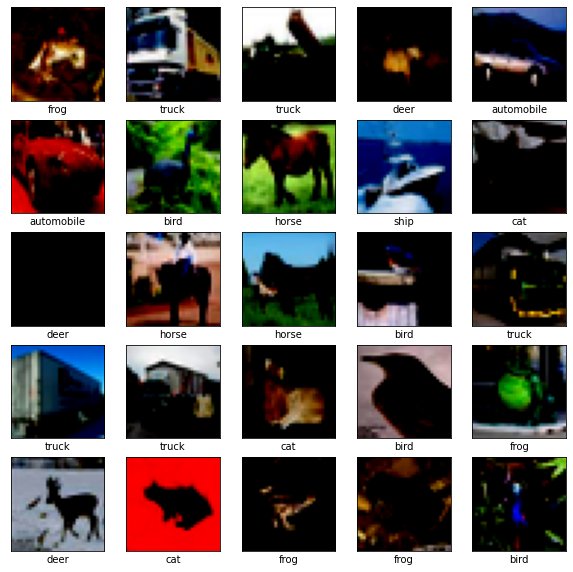

In [ ]:
%matplotlib inline
#Show first 25 training images below
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

### Resize images for use with MobileNetV2

In [ ]:
# Upsize all training and testing images to 96x96 for use with mobile net
minSize = 96 #minimum size requried for mobileNetV2
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# You may use cv2 package. Look for function:
#"cv2.resize(<originalImage>, dsize=(minSize, minSize), interpolation=cv2.INTER_AREA)"
# resize train image: You can first initialize a numpy array resized_train_images to store all the resized training images
resized_train_images = np.zeros((50000, minSize, minSize, 3), dtype=np.float32)
# <Write code for resizing>
for i in range(250):
    cv2.resize(train_images[i], dsize=(minSize, minSize), interpolation = cv2.INTER_AREA) 

# resize test image: You can first initialize a numpy array resized_test_images to store all the resized test images
resized_test_images = np.zeros((10000, minSize, minSize, 3), dtype=np.float32)
# <Write code for resizing>
for i in range(250):
    cv2.resize(test_images[i], dsize=(minSize, minSize), interpolation = cv2.INTER_AREA)

### Download MobileNetV2 model



In [ ]:
#<Write code for downloading MobileNetV2>
!pip install 'h5py<3.0.0'

model = tf.keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet',include_top=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Add custom layers at the end of downloaded model

In [ ]:
#<Write code for adding custom layers>

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


### Add loss function, compile and train the model, and check accuracy on test data

In [ ]:
#<Write code>
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0015, momentum=0.85), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
782/782 [==============================] - 23s 12ms/step - loss: 1.9575 - accuracy: 0.2933 - val_loss: 1.6109 - val_accuracy: 0.4151
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 1.4967 - accuracy: 0.4602 - val_loss: 1.4242 - val_accuracy: 0.4899
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 1.3356 - accuracy: 0.5240 - val_loss: 1.2896 - val_accuracy: 0.5291
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 1.2040 - accuracy: 0.5726 - val_loss: 1.2210 - val_accuracy: 0.5629
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 1.0954 - accuracy: 0.6154 - val_loss: 1.1369 - val_accuracy: 0.5974
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.9946 - accuracy: 0.6514 - val_loss: 1.0523 - val_accuracy: 0.6211
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 0.9201 - accuracy: 0.6772 - val_loss: 0.9601 - val_accuracy: 0.6609
Epoc

In [ ]:
l, a = model.evaluate(test_images, test_labels)
print("Accuracy: " + str(a * 100) + "%")

313/313 [==============================] - 1s 4ms/step - loss: 1.1138 - accuracy: 0.7223
Accuracy: 72.22999930381775%


### Extra code for producing different plots

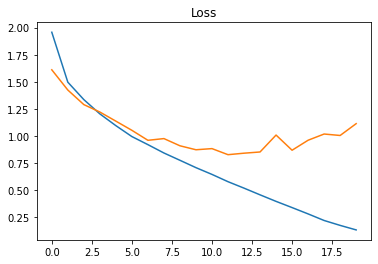

In [ ]:
plt.title("Loss")
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')

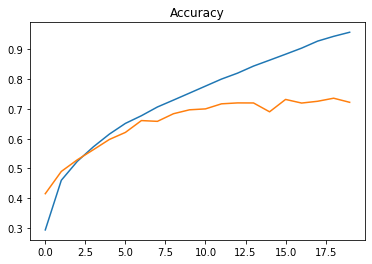

In [ ]:
plt.title("Accuracy")
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')